In [ ]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

# Sampling : BoRace

In [3]:
import pandas as pd
df = pd.read_csv('../Data/Cleaned_data.csv')
df['BoRace'].value_counts()

BoRace
5    604701
7     27157
2     17991
6     15949
3     10331
1      3772
4       966
Name: count, dtype: int64

In [6]:
df = df[df['BoRace'] != 4]
min_count = df['BoRace'].value_counts().min()
df = df.groupby('BoRace').sample(n=min_count, random_state=42)
df = df.reset_index(drop=True)
df

,Year,FHLBankID,FIPSStateCode,FIPSCountyCode,MSA,MinPer,TraMedY,LocMedY,Income,CurAreY,...,CoGender,BoAge,CoAge,Rate,Amount,Front,Back,Borrower Credit Score,Co-Borrower Credit Score,Self
0,2010,2,26,13,99999,16.92,33125,37063,24516,51800,...,2,27.0,29.0,0.0513,98340,0.2870,0.4500,2.0,1,2
1,2017,10,40,131,46140,30.65,46917,61182,99143,61400,...,4,50.0,42.0,0.0350,81225,0.0883,0.2267,5.0,9,2
2,2021,10,20,173,48620,9.79,84000,70558,63684,72300,...,4,47.0,42.0,2.5000,127500,16.0200,34.8700,3.0,9,2
3,2020,6,18,11,26900,10.02,128317,66803,937680,77800,...,1,43.0,44.0,3.2500,510400,3.0400,6.6700,4.0,5,2
4,2016,5,19,163,19340,10.99,140313,61723,182000,65000,...,2,50.0,50.0,0.0313,400000,0.1700,0.1800,5.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22627,2018,2,55,45,31540,4.12,76339,83743,81504,91700,...,4,43.0,42.0,0.0463,250400,0.2636,0.4437,5.0,9,2
22628,2018,6,26,139,24340,4.80,75924,65342,42732,67000,...,1,40.0,37.0,0.0350,91100,0.2500,0.2900,5.0,5,2
22629,2015,7,36,107,13780,4.73,57063,58258,29391,61800,...,4,67.0,42.0,0.0400,75000,0.2899,0.4168,4.0,9,2
22630,2017,9,39,35,17460,18.37,185234,65821,112608,66100,...,4,54.0,42.0,0.0413,228000,0.2025,0.4113,5.0,9,2


In [8]:
df["Year"].value_counts().count()

np.int64(13)


Training/Testing Split: 90%/10%

Model: ZeroR
 Accuracy: 0.1559, Precision: 0.8593, Recall: 0.1667, F1-Score: 0.0450, Specificity: 0.8333
Time taken: 0.01 seconds

Model: SGD Classifier
 Accuracy: 0.2208, Precision: 0.4489, Recall: 0.2187, F1-Score: 0.1368, Specificity: 0.8438
Time taken: 2.01 seconds

Model: Random Forest
 Accuracy: 0.7191, Precision: 0.7343, Recall: 0.7187, F1-Score: 0.7222, Specificity: 0.9439
Time taken: 3.28 seconds

Model: Decision Tree
 Accuracy: 0.6157, Precision: 0.6159, Recall: 0.6145, F1-Score: 0.6151, Specificity: 0.9232
Time taken: 0.30 seconds

Model: Extra Trees
 Accuracy: 0.7155, Precision: 0.7267, Recall: 0.7150, F1-Score: 0.7177, Specificity: 0.9432
Time taken: 1.52 seconds

Model: Gradient Boosting
 Accuracy: 0.7261, Precision: 0.7425, Recall: 0.7263, F1-Score: 0.7293, Specificity: 0.9453
Time taken: 28.83 seconds

Model: Support Vector Machine
 Accuracy: 0.2906, Precision: 0.2744, Recall: 0.2893, F1-Score: 0.2699, Specificity: 0.8581
Time taken: 71

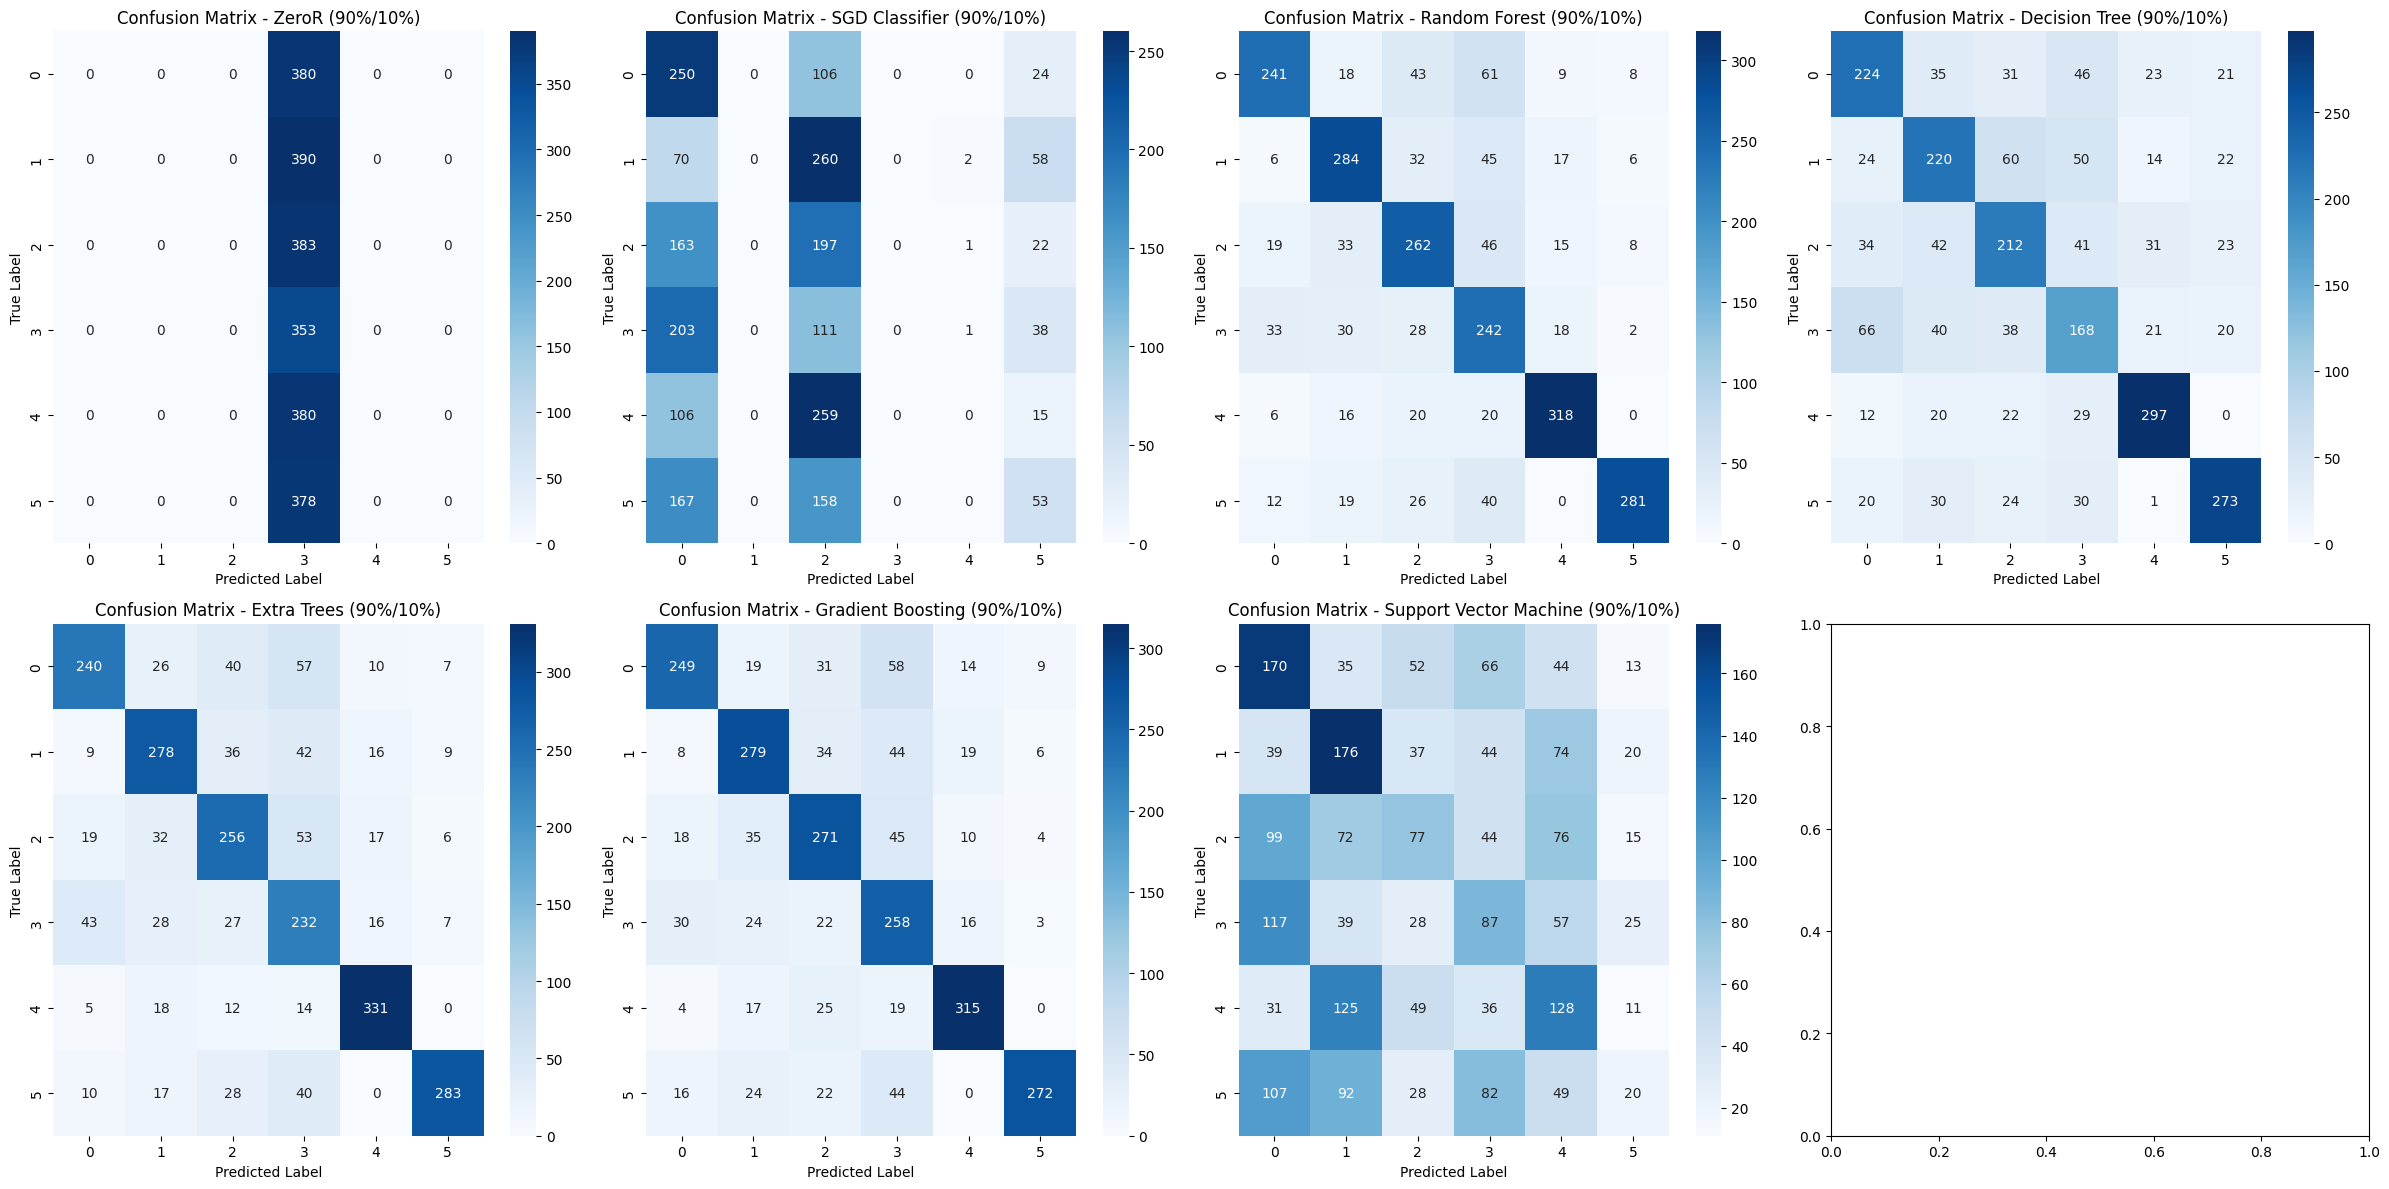


Training/Testing Split: 80%/20%

Model: ZeroR
 Accuracy: 0.1626, Precision: 0.8604, Recall: 0.1667, F1-Score: 0.0466, Specificity: 0.8333
Time taken: 0.01 seconds

Model: SGD Classifier
 Accuracy: 0.1898, Precision: 0.2354, Recall: 0.1922, F1-Score: 0.0950, Specificity: 0.8384
Time taken: 1.73 seconds

Model: Random Forest
 Accuracy: 0.7175, Precision: 0.7308, Recall: 0.7180, F1-Score: 0.7202, Specificity: 0.9436
Time taken: 2.91 seconds

Model: Decision Tree
 Accuracy: 0.6132, Precision: 0.6125, Recall: 0.6131, F1-Score: 0.6125, Specificity: 0.9227
Time taken: 0.26 seconds

Model: Extra Trees
 Accuracy: 0.7120, Precision: 0.7246, Recall: 0.7123, F1-Score: 0.7146, Specificity: 0.9424
Time taken: 1.42 seconds

Model: Gradient Boosting
 Accuracy: 0.7256, Precision: 0.7400, Recall: 0.7261, F1-Score: 0.7286, Specificity: 0.9452
Time taken: 25.47 seconds

Model: Support Vector Machine
 Accuracy: 0.2907, Precision: 0.2768, Recall: 0.2903, F1-Score: 0.2691, Specificity: 0.8582
Time taken: 57

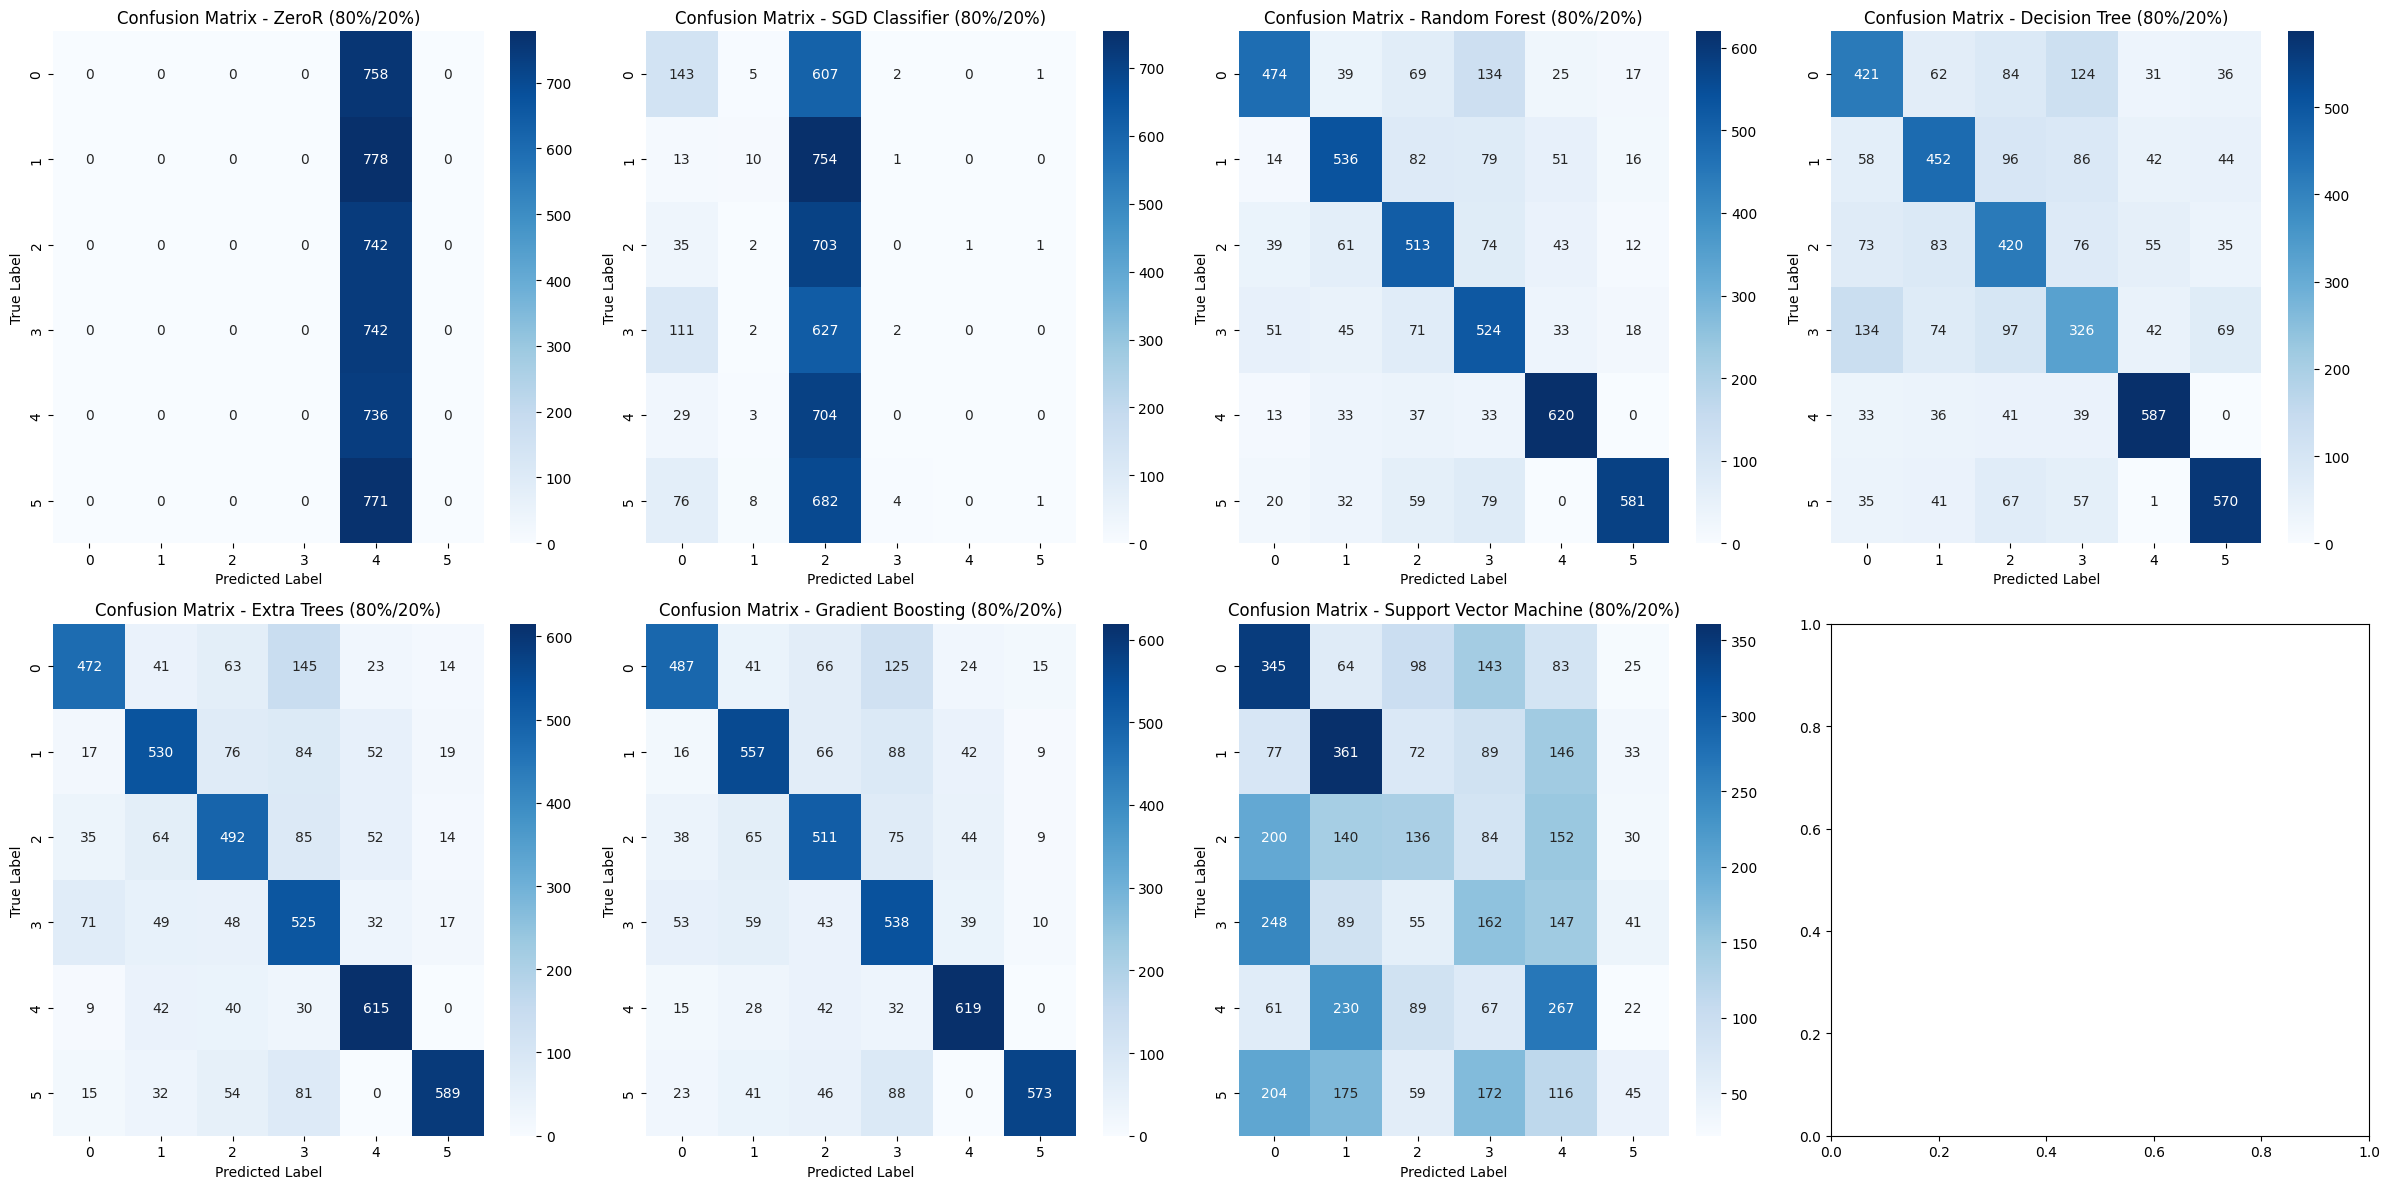


Training/Testing Split: 70%/30%

Model: ZeroR
 Accuracy: 0.1651, Precision: 0.8608, Recall: 0.1667, F1-Score: 0.0472, Specificity: 0.8333
Time taken: 0.01 seconds

Model: SGD Classifier
 Accuracy: 0.2001, Precision: 0.4107, Recall: 0.2007, F1-Score: 0.1066, Specificity: 0.8401
Time taken: 1.30 seconds

Model: Random Forest
 Accuracy: 0.7134, Precision: 0.7257, Recall: 0.7135, F1-Score: 0.7163, Specificity: 0.9427
Time taken: 2.59 seconds

Model: Decision Tree
 Accuracy: 0.6094, Precision: 0.6113, Recall: 0.6095, F1-Score: 0.6103, Specificity: 0.9219
Time taken: 0.23 seconds

Model: Extra Trees
 Accuracy: 0.7060, Precision: 0.7176, Recall: 0.7063, F1-Score: 0.7085, Specificity: 0.9412
Time taken: 1.21 seconds

Model: Gradient Boosting
 Accuracy: 0.7184, Precision: 0.7359, Recall: 0.7186, F1-Score: 0.7221, Specificity: 0.9437
Time taken: 22.45 seconds

Model: Support Vector Machine
 Accuracy: 0.2898, Precision: 0.2774, Recall: 0.2909, F1-Score: 0.2678, Specificity: 0.8581
Time taken: 43

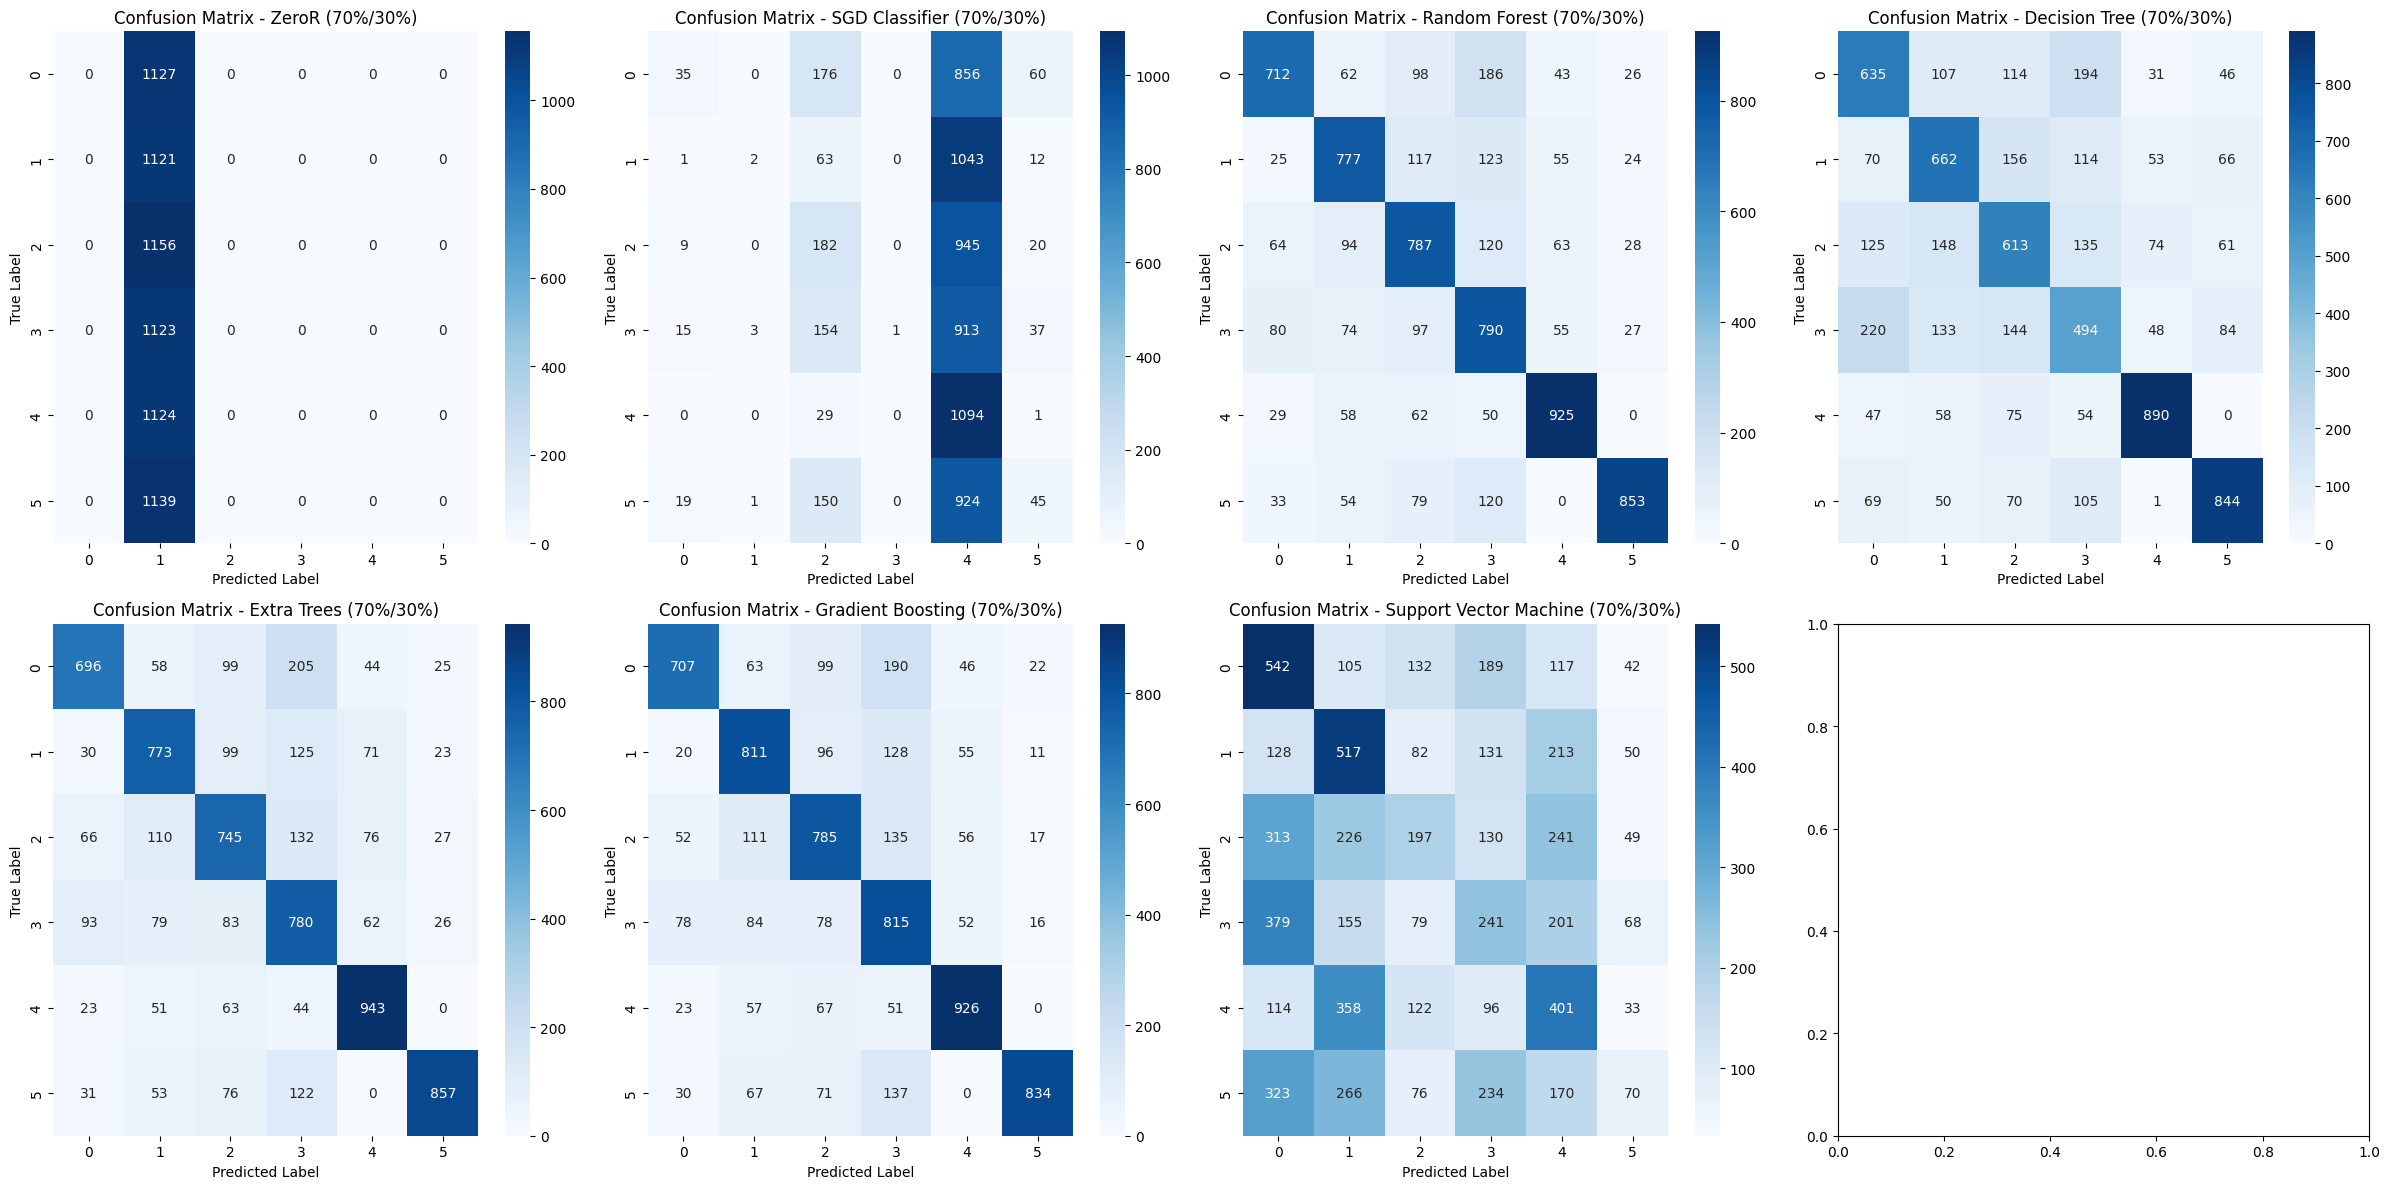


Training/Testing Split: 50%/50%

Model: ZeroR
 Accuracy: 0.1641, Precision: 0.8607, Recall: 0.1667, F1-Score: 0.0470, Specificity: 0.8333
Time taken: 0.01 seconds

Model: SGD Classifier
 Accuracy: 0.1654, Precision: 0.7276, Recall: 0.1668, F1-Score: 0.0475, Specificity: 0.8334
Time taken: 0.90 seconds

Model: Random Forest
 Accuracy: 0.7067, Precision: 0.7178, Recall: 0.7073, F1-Score: 0.7099, Specificity: 0.9413
Time taken: 1.83 seconds

Model: Decision Tree
 Accuracy: 0.6142, Precision: 0.6160, Recall: 0.6151, F1-Score: 0.6156, Specificity: 0.9228
Time taken: 0.16 seconds

Model: Extra Trees
 Accuracy: 0.7037, Precision: 0.7134, Recall: 0.7044, F1-Score: 0.7062, Specificity: 0.9407
Time taken: 0.95 seconds

Model: Gradient Boosting
 Accuracy: 0.7192, Precision: 0.7349, Recall: 0.7197, F1-Score: 0.7230, Specificity: 0.9438
Time taken: 16.50 seconds

Model: Support Vector Machine
 Accuracy: 0.2859, Precision: 0.2750, Recall: 0.2866, F1-Score: 0.2612, Specificity: 0.8573
Time taken: 24

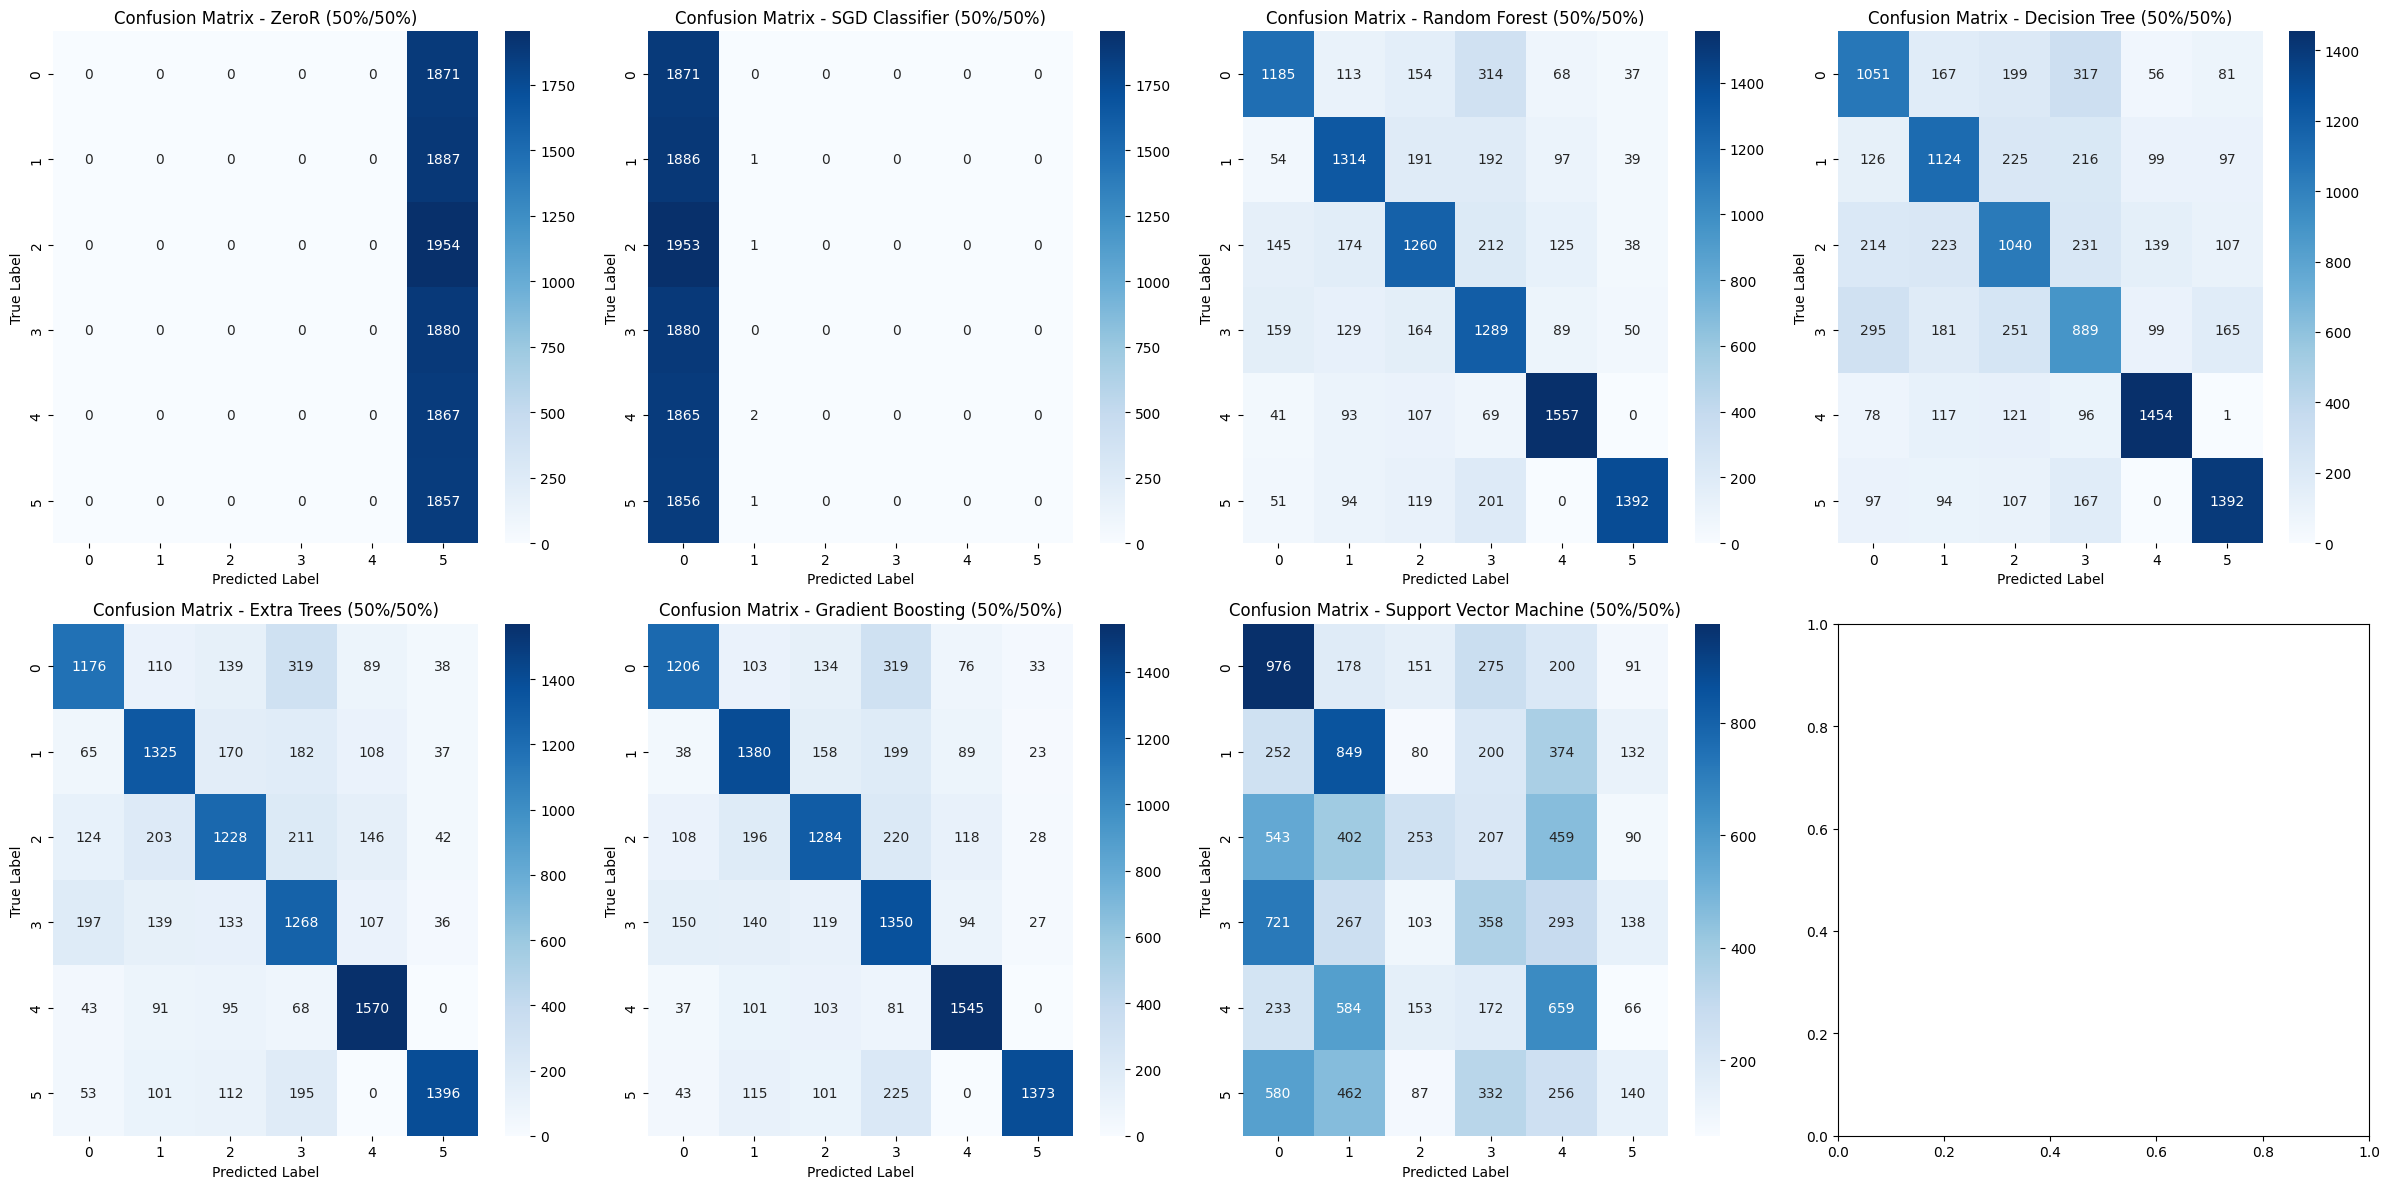

In [ ]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


results_dir = "BoRace_SPLITS"
os.makedirs(results_dir, exist_ok=True)
# df = pd.read_csv("'../Data/Sampled_data.csv'")

X = df.drop(columns=["BoRace","CoRace"])
y = df["BoRace"]

splits = [(0.90, 0.10), (0.80, 0.20), (0.70, 0.30), (0.50, 0.50)]

models = {
    "ZeroR": DummyClassifier(strategy="most_frequent"),
    "SGD Classifier": SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Logistic Regression": LogisticRegression(
    #     max_iter=1000, 
    #     random_state=42, 
    #     multi_class="multinomial",  # Ensures proper handling of multi-class classification
    #     solver="lbfgs"  # Use "saga" for large datasets
    #     ),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42), 
    # "KNN": KNeighborsClassifier(n_neighbors=7),
    "Support Vector Machine": SVC(kernel="rbf", probability=True, random_state=42),  
}

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = np.sum(cm) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + np.diag(cm)  # True Negatives per class
    fp = np.sum(cm, axis=0) - np.diag(cm)  # False Positives per class
    specificity_per_class = tn / (tn + fp)  # Compute specificity per class
    return np.mean(specificity_per_class)  # Return the average specificity

for train_size, test_size in splits:
    train_percent = int(train_size * 100)
    test_percent = int(test_size * 100)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    print(f"\nTraining/Testing Split: {train_percent}%/{test_percent}%\n")
    
    results = {}
    conf_matrices = {}
    
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=1)
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        spec = specificity_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        elapsed_time = time.time() - start_time
        
        results[name] = {
            "Accuracy": acc, 
            "Precision": prec, 
            "Recall": rec, 
            "F1-Score": f1, 
            "Specificity": spec,
            "Total Runtime (s)": elapsed_time,
        }
        conf_matrices[name] = cm
        print(f"Model: {name}\n Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}, Specificity: {spec:.4f}")
        print("Time taken: {:.2f} seconds\n".format(elapsed_time))
        
    results_df = pd.DataFrame(results).T
    results_file = f"{results_dir}/results_split_{train_percent}_{test_percent}.csv"
    results_df.to_csv(results_file, index=True)
    print(f"Results saved to {results_file}")

    for name, cm in conf_matrices.items():
        cm_file = f"{results_dir}/conf_matrix_{train_percent}_{test_percent}_{name.replace(' ', '_')}.csv"
        pd.DataFrame(cm).to_csv(cm_file, index=False)
        print(f"Confusion Matrix for {name} saved to {cm_file}")
    
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    axes = axes.ravel()
    
    for i, (name, cm) in enumerate(conf_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name} ({train_percent}%/{test_percent}%)')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

In [ ]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Create results directory if not exists
cv_results_dir = "cv_results"
os.makedirs(cv_results_dir, exist_ok=True)

# Load the dataset
df = pd.read_csv("merged_data_step_3_sampled_v2.csv", low_memory=False) 

# Define features and target
X = df.drop(columns=["Borrower Credit Score"])
y = df["Borrower Credit Score"]

# Define models
models = {
    "ZeroR": DummyClassifier(strategy="most_frequent"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    # "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    # "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = np.sum(cm) - np.sum(cm, axis=0) - np.sum(cm, axis=1) + np.diag(cm)  # True Negatives per class
    fp = np.sum(cm, axis=0) - np.diag(cm)  # False Positives per class
    specificity_per_class = tn / (tn + fp)  # Compute specificity per class
    return np.mean(specificity_per_class)  # Return the average specificity

# Define number of folds for cross-validation
folds_list = [5, 10, 20]

# Iterate over each number of folds
for num_folds in folds_list:
    print(f"\nPerforming {num_folds}-fold cross-validation\n")
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    results = {}
    conf_matrices = {}
    
    for name, model in models.items():
        start_time = time.time()
        y_pred = cross_val_predict(model, X, y, cv=kf)
        total_runtime = time.time() - start_time  # End timing
        
        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred, average='weighted', zero_division=1)
        rec = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')
        spec = specificity_score(y, y_pred)
        cm = confusion_matrix(y, y_pred)
        
        results[name] = {
            "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1,
            "Specificity": spec, "Total Runtime (s)": total_runtime, "Total Runtime (min)": total_runtime / 60
        }
        
        conf_matrices[name] = cm
        
        print(f"Model: {name}\n Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}, Specificity: {spec:.4f}")
        print("Time taken: {:.2f} seconds".format(total_runtime))
        print("Time taken: {:.2f} minutes\n".format(total_runtime / 60))
    
    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results).T
    results_file = f"{cv_results_dir}/results_cv_{num_folds}_folds.csv"
    results_df.to_csv(results_file, index=True)
    print(f"Results saved to {results_file}")

    # Save confusion matrices
    for name, cm in conf_matrices.items():
        cm_file = f"{cv_results_dir}/conf_matrix_cv_{num_folds}_folds_{name.replace(' ', '_')}.csv"
        pd.DataFrame(cm).to_csv(cm_file, index=False)
        print(f"Confusion Matrix for {name} saved to {cm_file}")
    
    # Plot confusion matrices
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    axes = axes.ravel()
    
    for i, (name, cm) in enumerate(conf_matrices.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name} ({num_folds}-Folds CV)')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()
